In [51]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [33]:
x, y = make_moons(n_samples=1000, noise=0.2)

In [34]:
df = {'data1': x[:, 0], 'data2': x[:, 1]}
dataset = pd.DataFrame(df)
dataset.head(3)

,data1,data2
0,0.158172,0.944315
1,-0.628280,1.042584
2,0.471800,0.486449


In [35]:
y = pd.DataFrame({'predict': y})

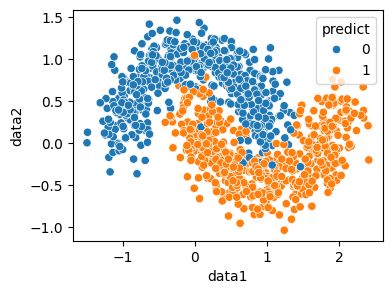

In [37]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='data1', y='data2', data=dataset, hue=y['predict'])
plt.show()

In [38]:
x = dataset.iloc[:, :]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test) * 100, dt.score(x_train, y_train) * 100

(92.625, 100.0)

In [46]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_test, y_test) * 100, sv.score(x_train, y_train) * 100

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(96.125, 95.5)

In [47]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test) * 100, gnb.score(x_train, y_train) * 100

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(87.625, 84.5)

In [58]:
li = [("dt1",DecisionTreeClassifier()), ("sv1",SVC()), ("gnb1",GaussianNB())]
vc = VotingClassifier(li, weights=[10, 6, 7])
vc.fit(x_train, y_train)

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 6, 7])

In [59]:
vc.score(x_train, y_train)*100, vc.score(x_test, y_test)*100

(96.5, 93.75)

In [61]:
prd = {
  'dt': dt.predict(x_test),
  'svm':sv.predict(x_test),
  'gnb': gnb.predict(x_test),
  'vc': vc.predict(x_test)
}
prd_df = pd.DataFrame(prd)
prd_df

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
795,1,1,1,1
796,0,0,0,0
797,0,0,0,0
798,0,0,0,0
